# Nikhil Nayak (Data Science and Business Analytics- #GRIPDEC20)

# Task 3- Exploratory Data Analysis(EDA)


## Problem Definition:
## As a business manager, try to find out the weak areas where you can work to make more profit and determine the business problems you can derive by exploring the data.

## Dataset - SampleSuperstore.csv

### Importing the Libraries and Dataset

In [2]:
#Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#importing the dataset
df= pd.read_csv(r'SampleSuperstore.csv')

In [10]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [37]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [38]:
df.duplicated().sum()

17

In [39]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Data Information and Data Cleaning

In [17]:
pd.crosstab(index=df['Category'],columns='count')

col_0,count
Category,
Furniture,2121
Office Supplies,6026
Technology,1847


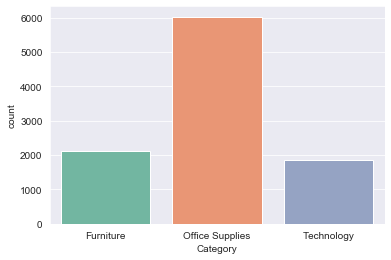

In [7]:
sns.set_style("darkgrid")
sns.countplot(x='Category',palette="Set2",data=df)

In [20]:
pd.crosstab(index=df['Sub-Category'],columns='count')

col_0,count
Sub-Category,
Accessories,775
Appliances,466
Art,796
Binders,1523
Bookcases,228
Chairs,617
Copiers,68
Envelopes,254
Fasteners,217


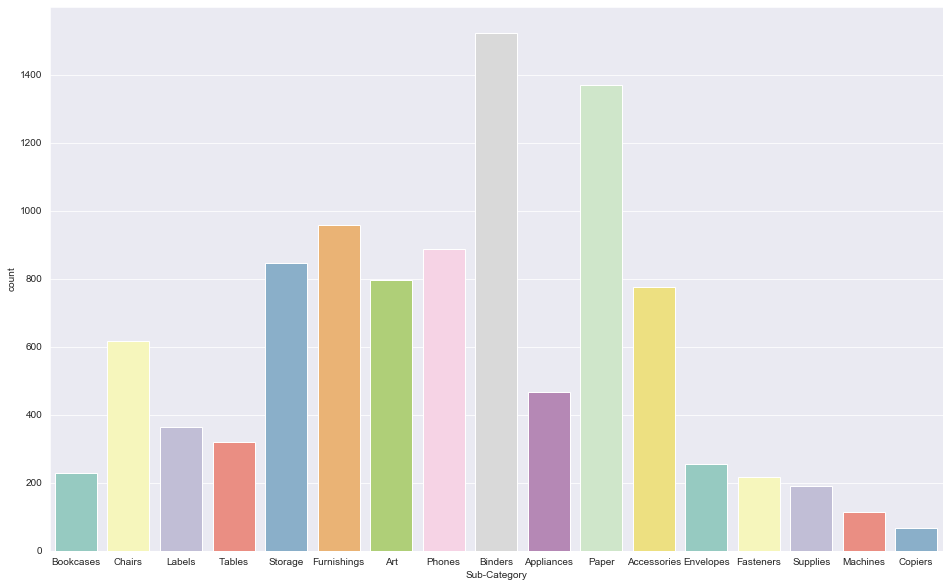

In [5]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.countplot(x='Sub-Category',data=df,palette='Set3')

Text(0, 0.5, 'Profit')

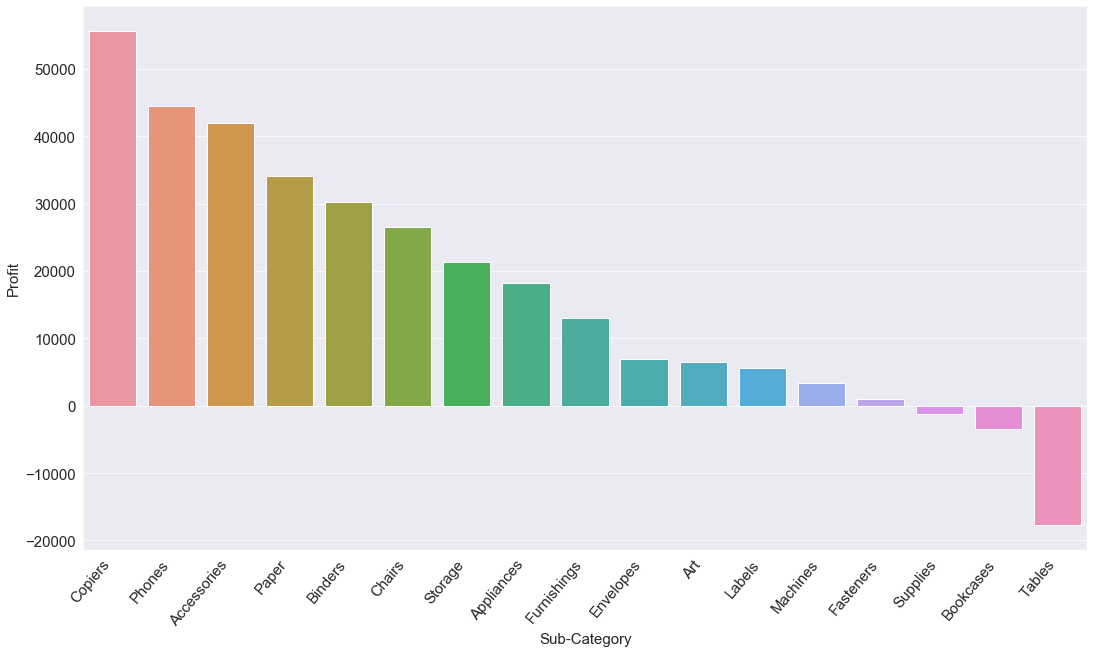

In [25]:
subctg=df.groupby('Sub-Category')['Profit'].sum().to_frame().reset_index()
subctg=subctg.sort_values(by='Profit',ascending=False)
plt.figure(figsize=(18,10))
sns.barplot(x='Sub-Category',y='Profit',data= subctg)
plt.yticks(fontsize=15)
plt.xticks(rotation = 50, ha='right',fontsize= 15)
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel('Profit',fontsize=15)

<Figure size 432x288 with 0 Axes>

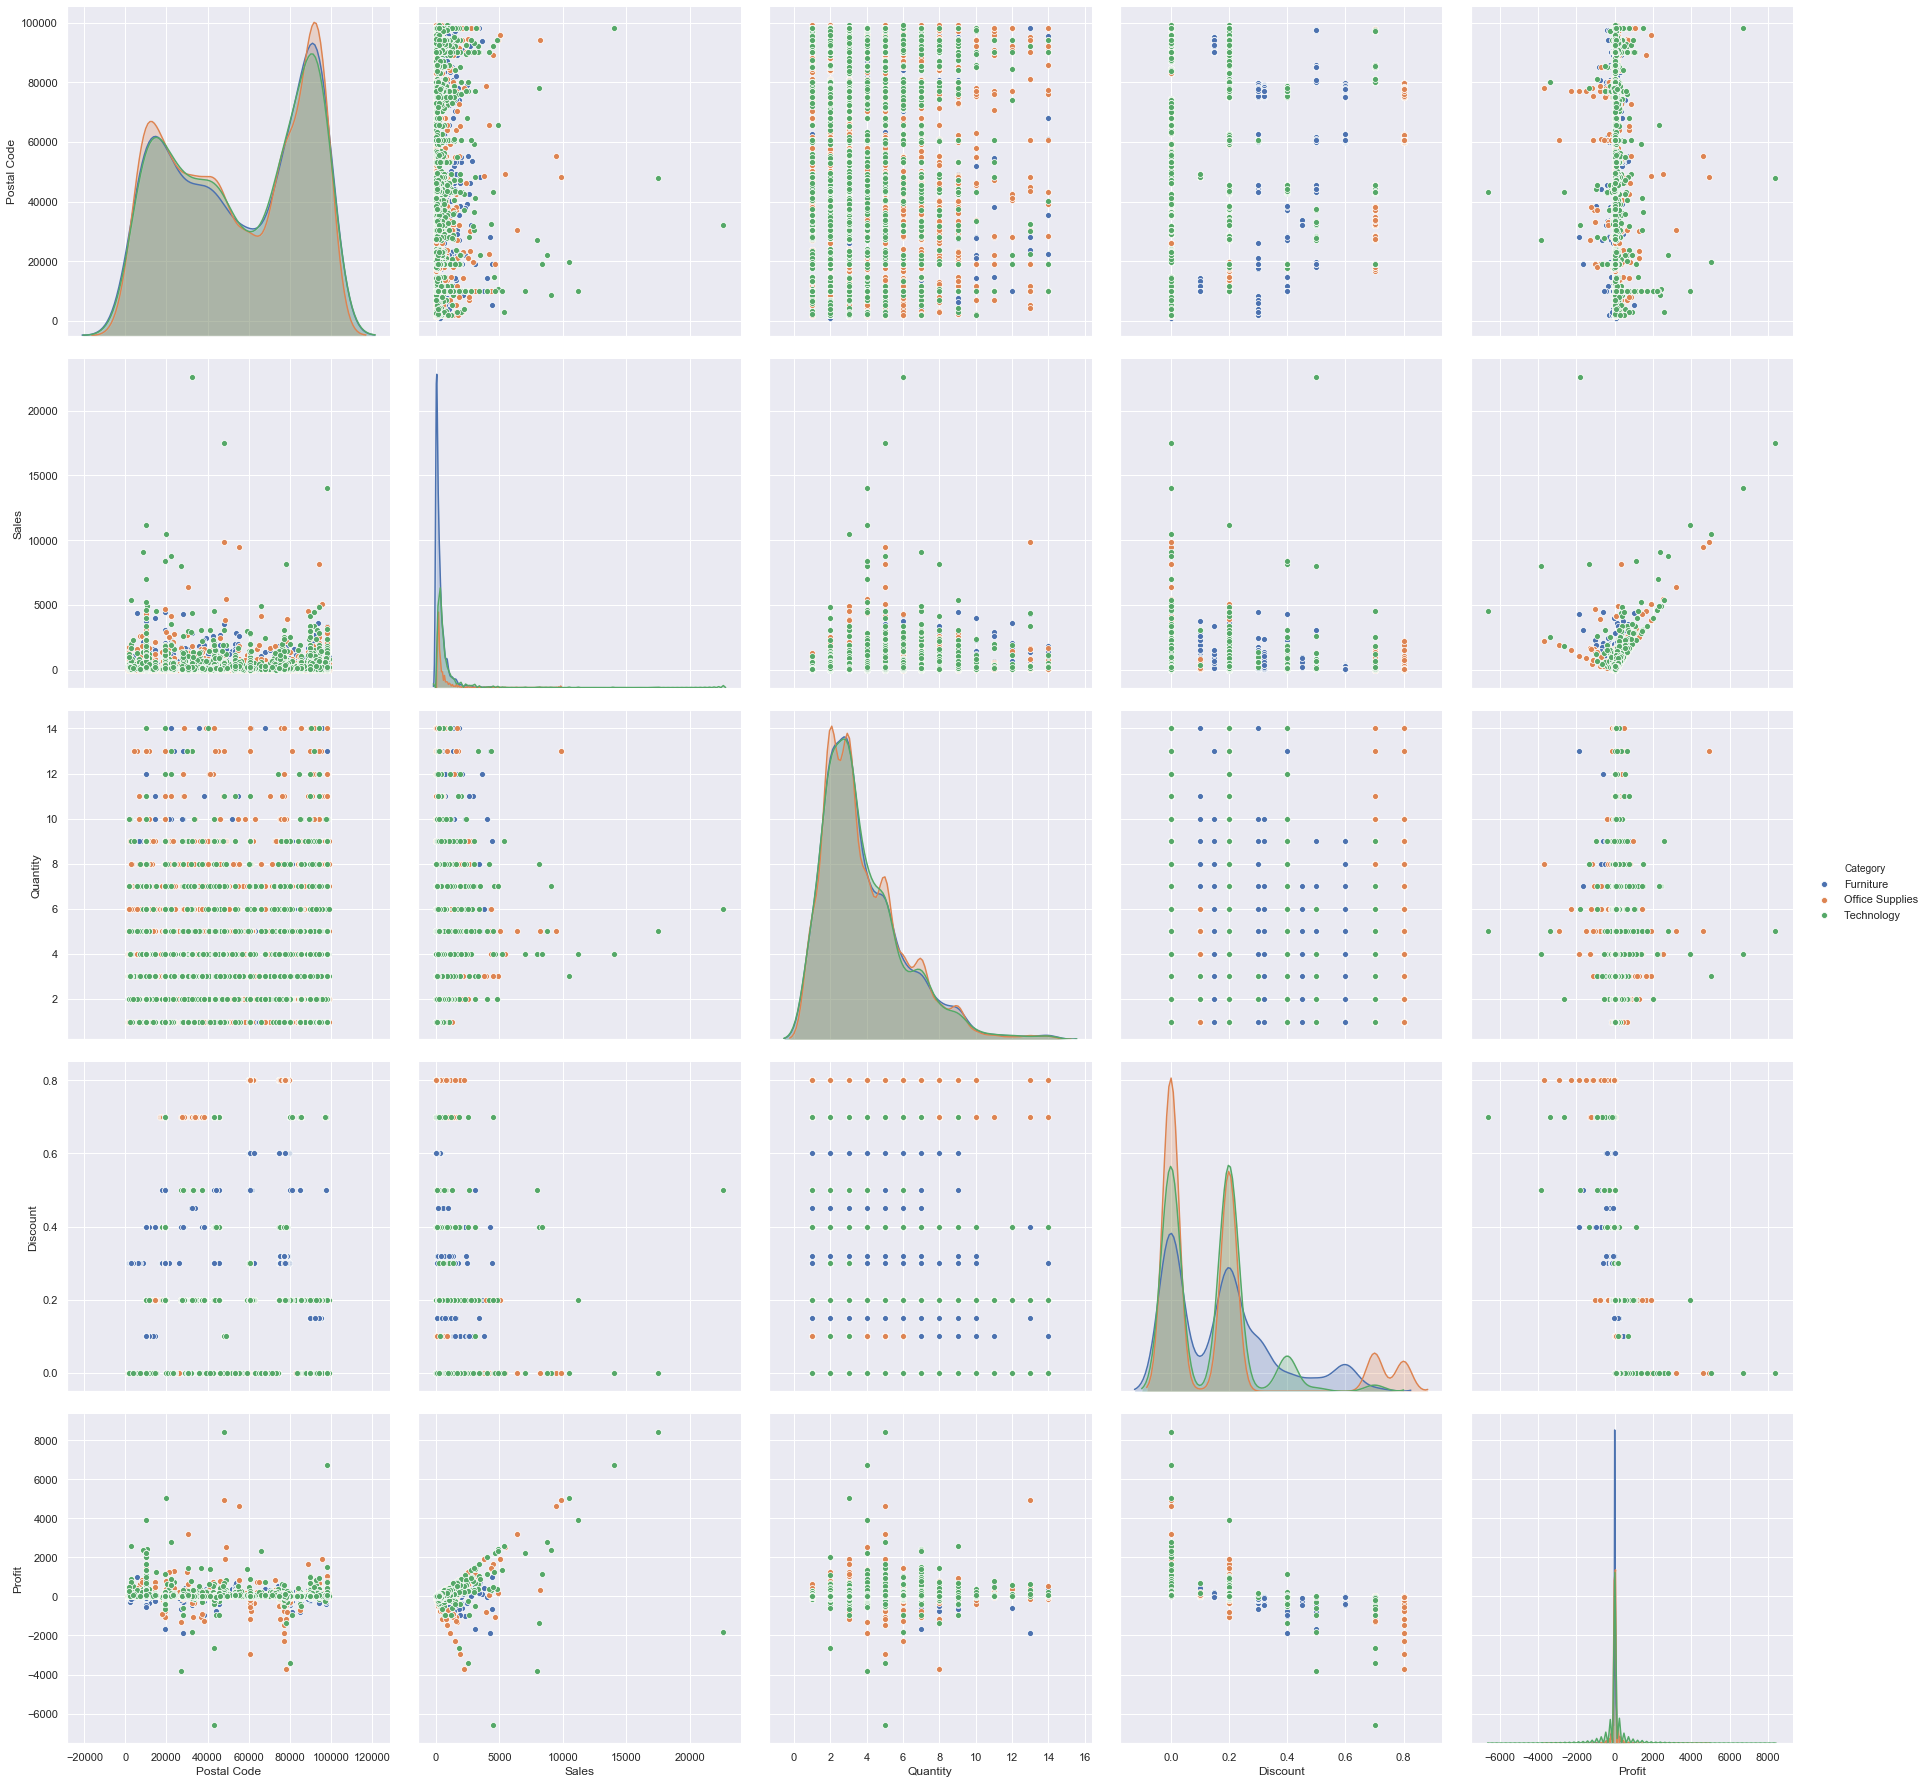

In [28]:
cat_col = ['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category']
for col in cat_col:
    sns.set()
    cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit']
plt.figure()    
sns.pairplot(df[cols], height=5.0, hue='Category')
plt.show()

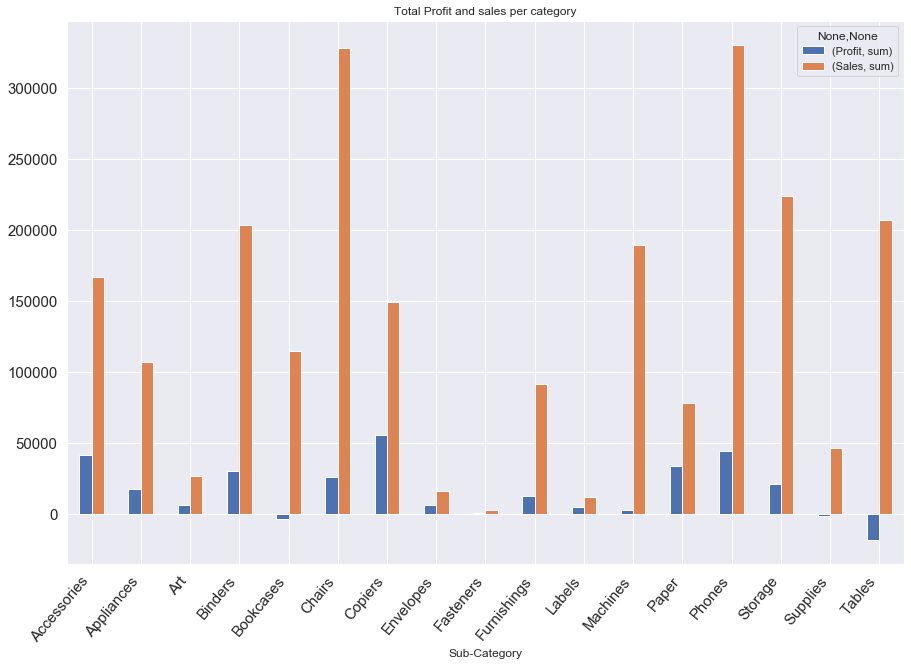

In [33]:
s=df.groupby('Sub-Category')['Profit','Sales'].agg(['sum'])
s.plot.bar(rot=0, title="Total Profit and sales per category",figsize=(15,10));
plt.yticks(fontsize=15)
plt.xticks(rotation = 50, ha='right',fontsize= 15)
plt.show(block=True);

Text(0, 0.5, 'Profit')

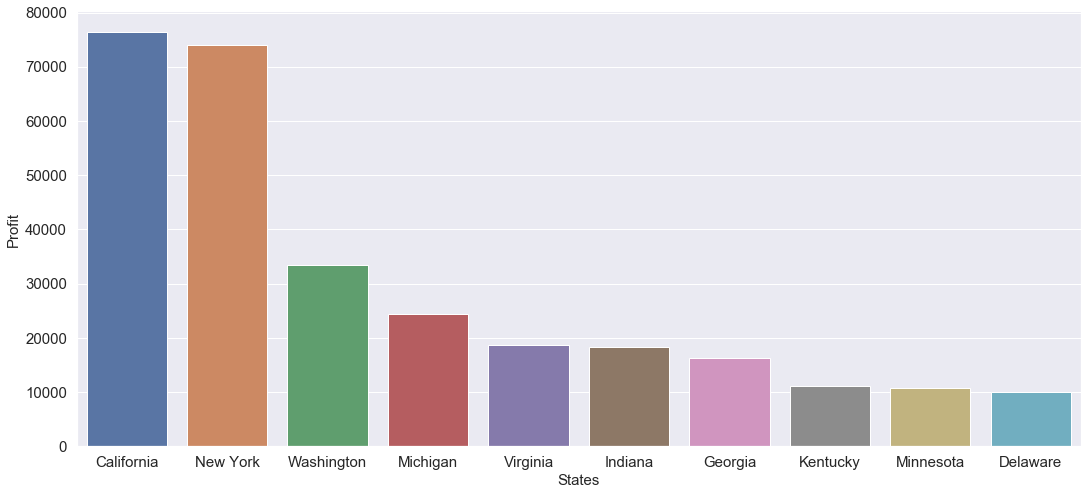

In [30]:
#check for the state with top profit
top_profit_state= df.groupby('State')['Profit'].sum().to_frame().reset_index().nlargest(10,'Profit')
plt.figure(figsize=(18,8))
sns.barplot(x='State',y= 'Profit',data= top_profit_state)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('States', fontsize= 15)
plt.ylabel('Profit',fontsize= 15)

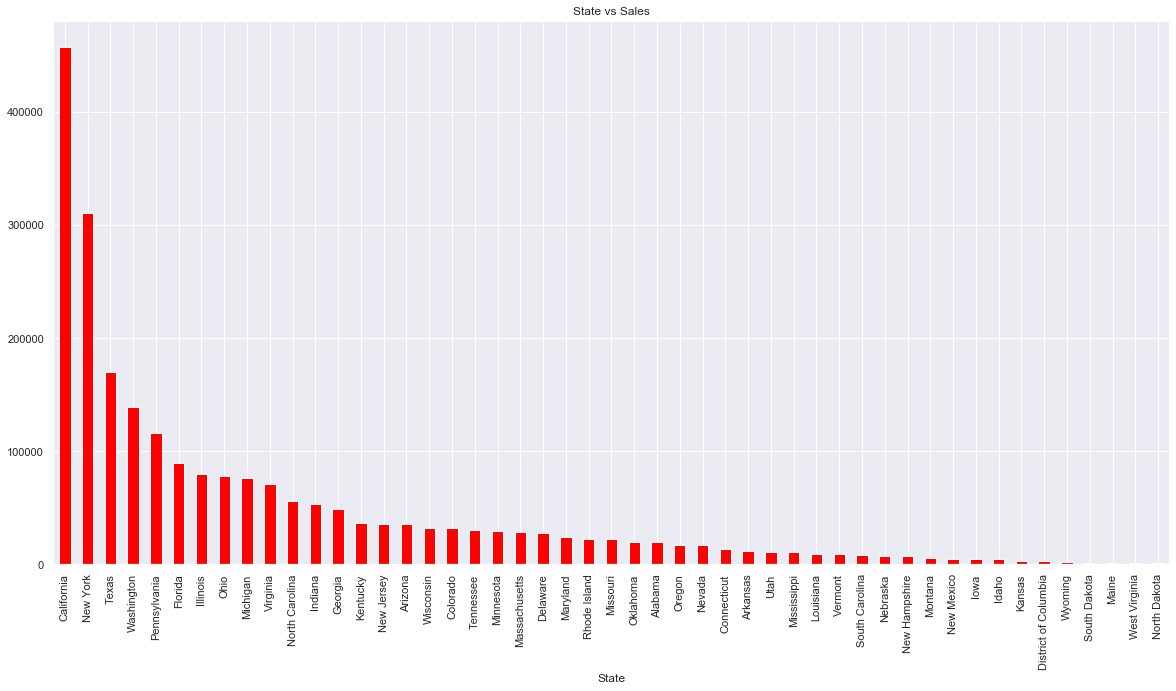

In [36]:
statewise=df.groupby(['State'])['Sales'].sum()
statewise.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title('State vs Sales')
statewise.plot.bar(color='red')

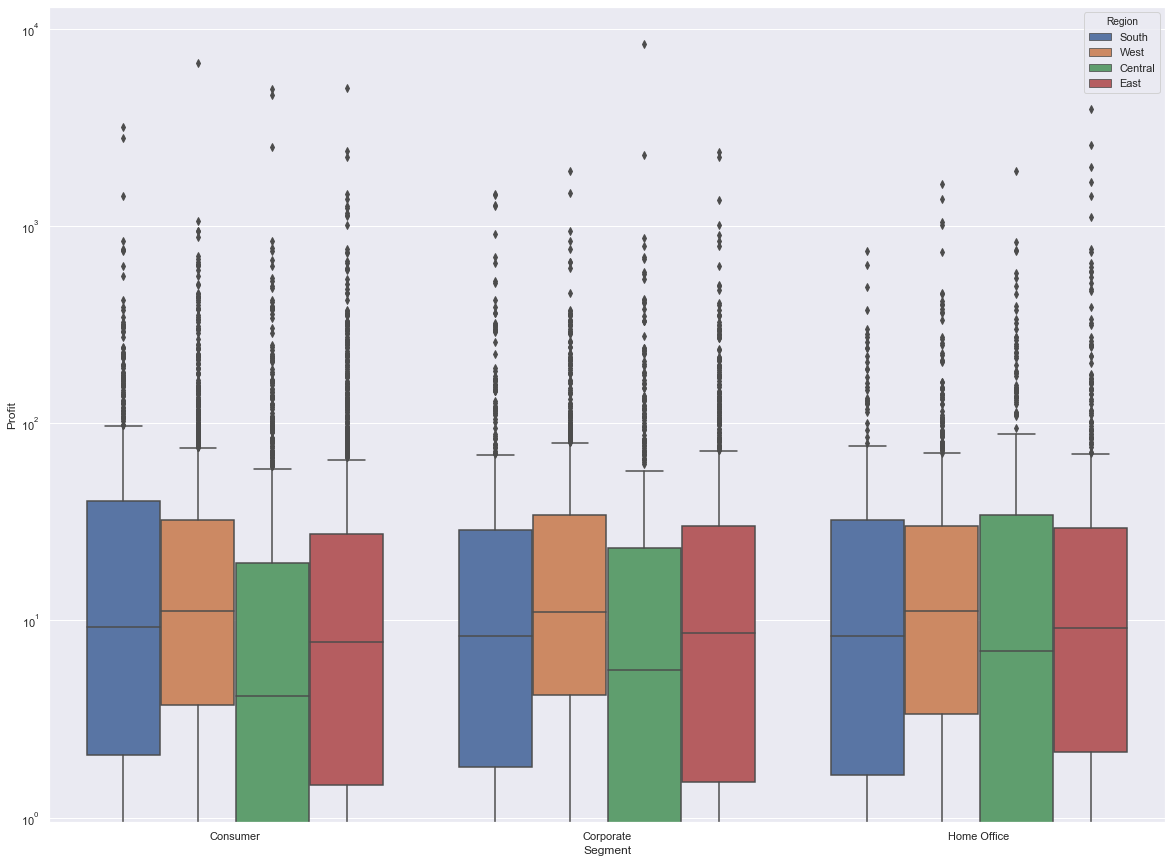

In [40]:
plt.figure(figsize = (20, 15))
ax=sns.boxplot(x = 'Segment', y = 'Profit', hue = 'Region', data = df)
ax.set_yscale('log')
plt.show()

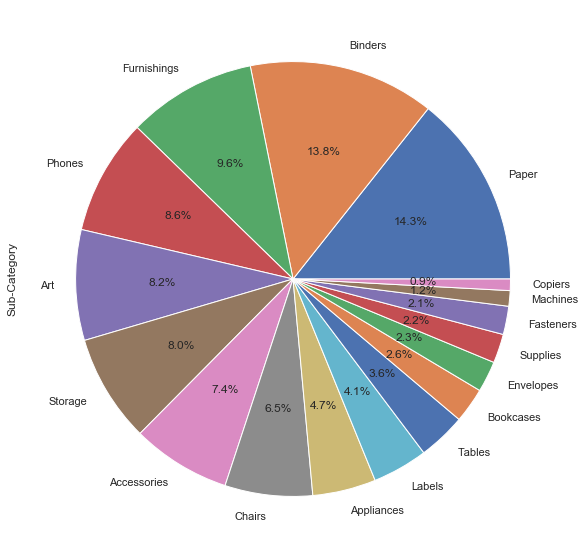

In [42]:
cf_data = df.where(df.State == 'California')
cf_data.head()
plt.figure(figsize=(10,10))
cf_data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

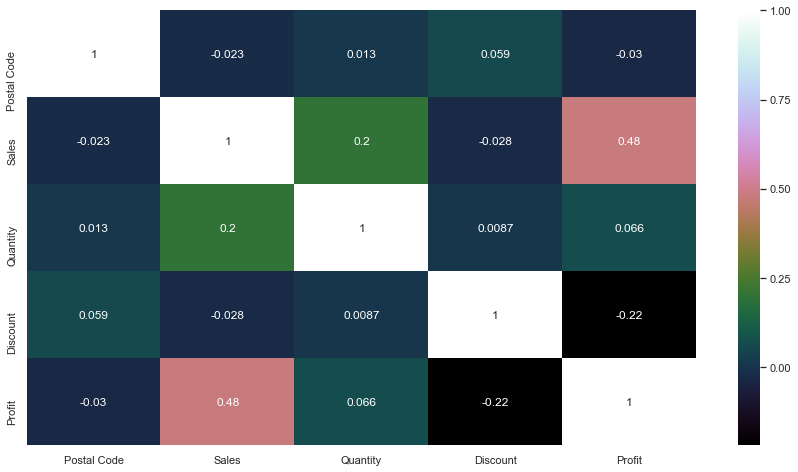

In [50]:
#heatmap to check the correlation between the columns of the dataset
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap= "cubehelix")
plt.show()

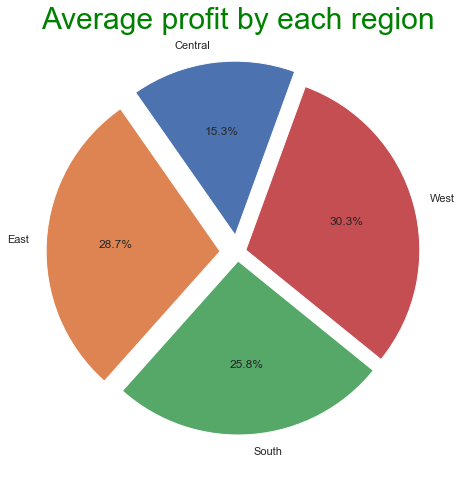

In [47]:
region= df.groupby('Region')['Profit'].mean().reset_index()
labels= df['Region'].unique()
plt.figure(figsize=(12,8))
plt.pie(region['Profit'],autopct='%1.1f%%',labels=region['Region'].unique(),explode=(0.1,0.1,0.05,0.05),startangle=70)
plt.title('Average profit by each region',size=30, color='green')
plt.show()

# Conclusions:

### Taking the above data into consideration, we can see that the 'Office Supplies' category accounted for the most revenue. In this category, Binders and Papers contributed to the maximum of the sales but resulted in an average profit. 
### Copiers must be promoted, in order to increase its sales as it yields maximum profit. 
### The above two plots(Count vs Sub-Cateogry and Profit vs Sub-category) displays a significant example of negative and postive correlations.While the sale of Tables incurred huge losses,Copiers made a bumper profit.
### It can be inferred that there is a positive correlation between the sales and profit. The increase in Sales resulted in an overall profit. 
### The Standard Class Shipping Mode was the most preferred mode among all the other modes of transport.
### Looking into the state-wise statistics, high business activity was found among the states of California,New York and Texas.On the other hand,states like North Dakota, West Virginia and District of Columbia were least involved.
### Binders and Papers were the largest selling commodities in California.
### The discount factor is not playing any role in making profit.
### The west region gives maximum profit as compared to the other regions.
### The focus on the central region should be more as more losses are observed there .



